In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib
from scipy.stats import norm

%precision 3
pd.set_option('display.precision', 3)


1-1) Iris(붓꽃) 데이터셋을 불러오고, 데이터프레임으로 변환한 후 첫 5개 행을 출력하시오


In [3]:
file = "./iris.csv"
irisDF = pd.read_csv(file)
irisDF.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


1-2) 데이터프레임의 기본 정보를 확인하고, 각 열의 데이터 타입을 제시하시오


In [4]:
irisDF.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


1-3) 붓꽃의 품종에 대한 클래스 분포를 확인하고, 각 클래스별 데이터 개수를 제시하시오


In [8]:
irisDF["species"].value_counts()


species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

2-1) 붓꽃 데이터셋에서 각 특성 간의 산점도(scatter plot)를 그리되, 각 클래스별로 다른 색상을 사용하여 시각화하시오


In [12]:
def draw_scatter(x, y, species):
    poly_fit = np.polyfit(x, y, deg=1)
    poly_1d = np.poly1d(poly_fit)
    xs = np.linspace(x.min(), x.max())
    ys = poly_1d(xs)
    plt.plot(xs, ys, label=f"{poly_fit[1]:.2f} + {poly_fit[0]:.2f}x", lw=0.5)
    plt.scatter(x, y, label=species)
    plt.legend()


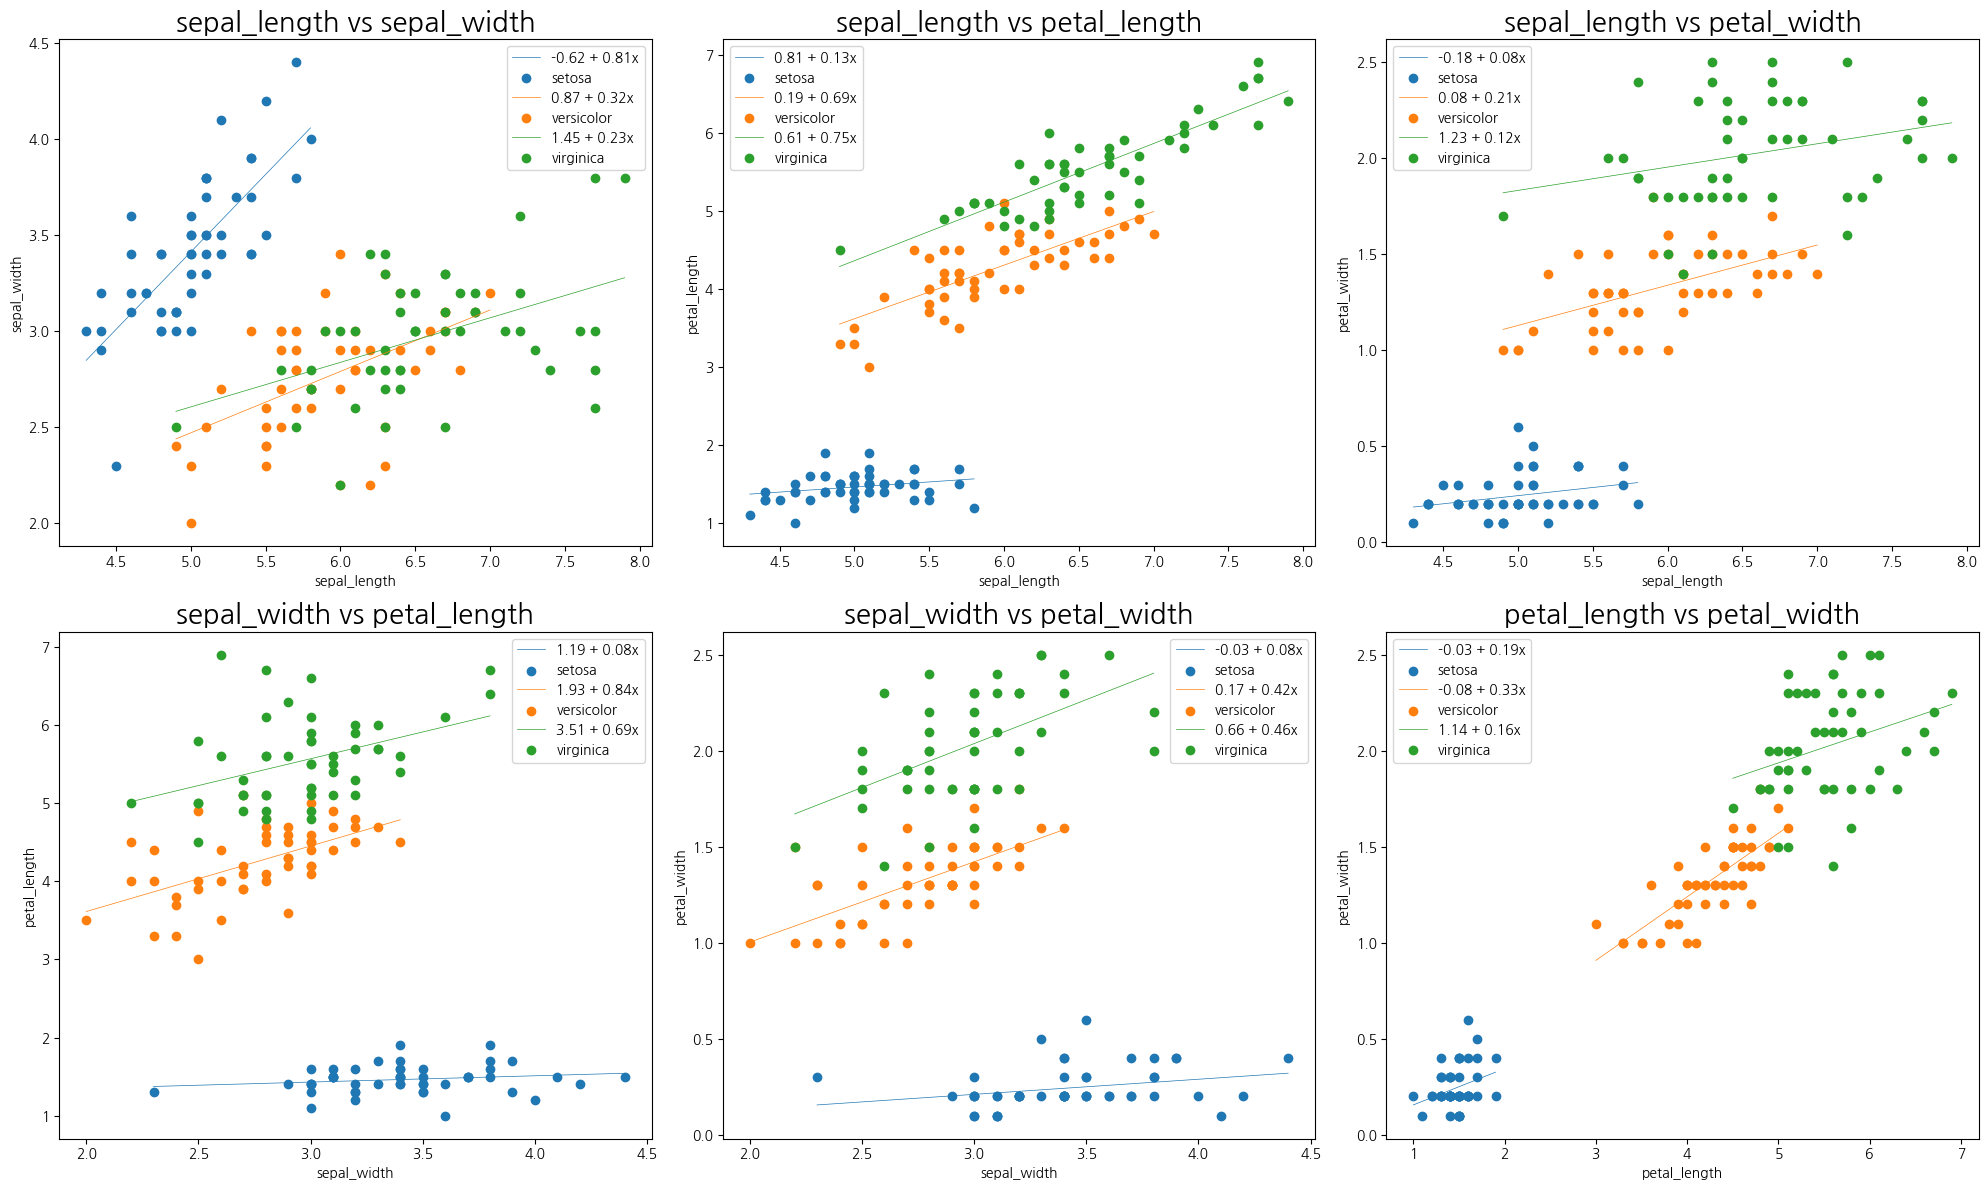

In [49]:
plt.figure(figsize=(20, 12))
num = 1
for i in range(len(irisDF.columns[:-1])):
    for j in range(i + 1, len(irisDF.columns[:-1])):
        plt.subplot(2, 3, num)
        for species in irisDF["species"].unique():
            x = irisDF[irisDF["species"] == species][irisDF.columns[i]]
            y = irisDF[irisDF["species"] == species][irisDF.columns[j]]
            draw_scatter(x, y, species)
            plt.xlabel(irisDF.columns[i])
            plt.ylabel(irisDF.columns[j])
        plt.title(f"{irisDF.columns[i]} vs {irisDF.columns[j]}", fontsize=20)
        num += 1
plt.tight_layout()
plt.show()


2-2) 꽃받침의 길이(Sepal Length)와 꽃받침의 너비(Sepal Width)의 관계를 시각화하고, 각 클래스별로 구분하여 출력하시오


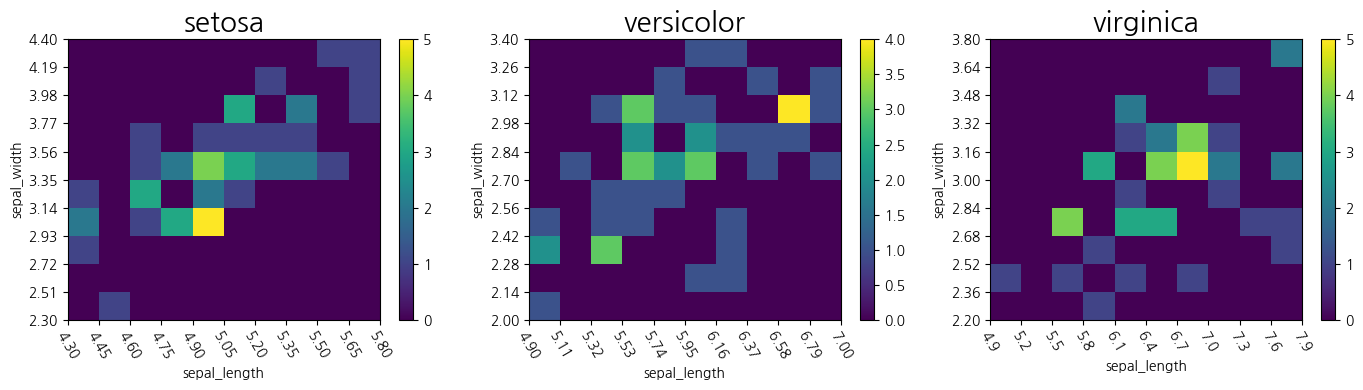

In [47]:
plt.figure(figsize=(14, 4))
num = 1
for species in irisDF["species"].unique():
    x = irisDF[irisDF["species"] == species]["sepal_length"]
    y = irisDF[irisDF["species"] == species]["sepal_width"]
    plt.subplot(1, 3, num)
    c = plt.hist2d(x, y)
    plt.xlabel("sepal_length")
    plt.ylabel("sepal_width")
    plt.xticks(c[1], rotation=300)
    plt.yticks(c[2])
    plt.colorbar(c[3])
    plt.title(species, fontsize=20)
    num += 1
plt.tight_layout()
plt.show()


3-1) 꽃잎의 길이(Petal Length)를 연속확률변수로 가정할 때, 이 확률변수의 평균과 분산을 계산하시오


In [89]:
petal_length = np.array(irisDF["petal_length"])
print(f"평균: {round(np.mean(petal_length), 2)}")
print(f"분산: {round(np.var(petal_length), 2)}")


평균: 3.76
분산: 3.09


3-2) 꽃잎의 너비(Petal Width)를 연속확률변수로 가정할 때, 이 확률변수의 확률밀도함수(probability density function, PDF)를 계산하고 그래프로 시각화하시오


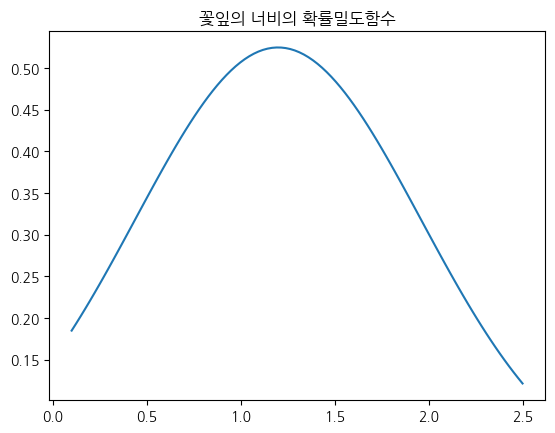

In [86]:
petal_widths = irisDF["petal_width"]
x = np.linspace(petal_widths.min(), petal_widths.max(), 100)
y = norm.pdf(x, np.mean(petal_widths), np.std(petal_widths))
plt.plot(x, y)
plt.title("꽃잎의 너비의 확률밀도함수")
plt.show()


3-3) 꽃잎의 길이(Petal Length)가 4cm 이상 5cm 미만일 확률을 계산하시오


In [71]:
petal_range = ((petal_length >= 4) & (petal_length < 5)).sum()
petal_count = len(petal_length)
print(
    f"꽃잎의 길이가 4cm 이상 5cm 미만일 확률: {round(petal_range / petal_count * 100, 2)}%"
)


꽃잎의 길이가 4cm 이상 5cm 미만일 확률: 28.67%
